In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [42]:
# Load dataset
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [43]:
# Select features and target column
X = df[['MonthlyHours']].values  # Feature column
y = df['ElectricityBill'].values  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# HANDLE MISSING DATA
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Data per Column:")
print(missing_data)

Missing Data per Column:
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [45]:
#ENCODING

# Define categorical columns (those with data type 'object' or 'category')
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Label Encoding for categorical columns (if applicable)
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Check the changes
print(data[categorical_cols].head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


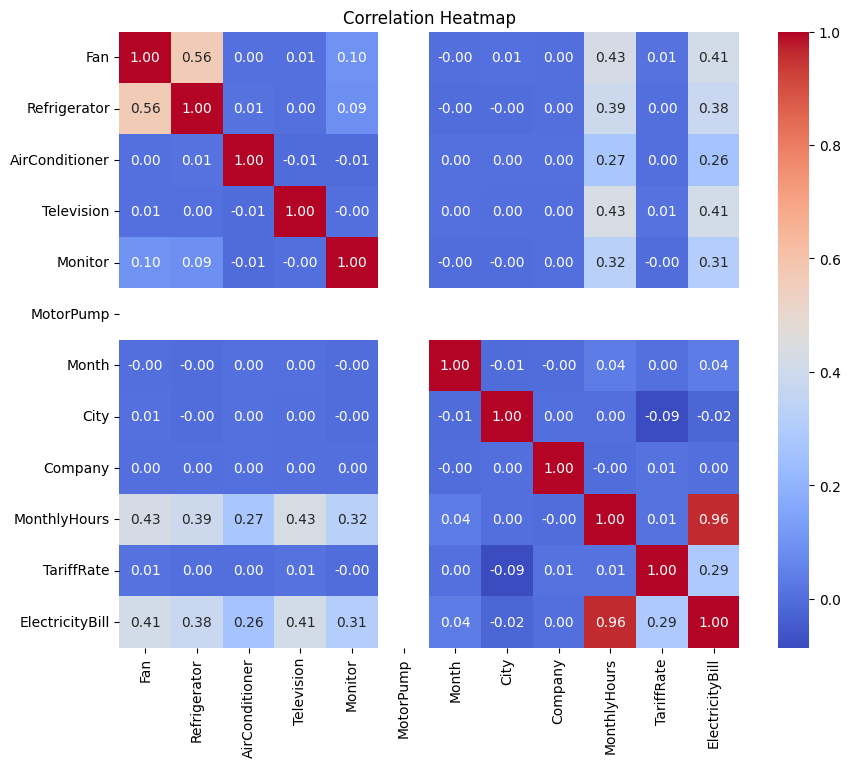

In [46]:
#CORELATION
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Define numerical columns (those with data type 'float64' or 'int64')
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Standard Scaling (Z-score normalization) for numerical data
scaler = StandardScaler()

# Apply scaling to numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Check the scaled data
print(data[numerical_cols].head())


        Fan  Refrigerator  AirConditioner  Television   Monitor  MotorPump  \
0  0.367281      0.773990        0.444693   -1.129725 -0.478847        0.0   
1  0.915652      0.176103        0.444693   -1.650926 -0.478847        0.0   
2 -1.277830     -1.019672        0.444693   -1.129725  1.061633        0.0   
3 -1.277830      0.176103        1.341176    1.476277 -0.478847        0.0   
4 -0.546669      0.773990        0.444693   -0.261058 -0.478847        0.0   

      Month      City   Company  MonthlyHours  TariffRate  ElectricityBill  
0  1.019960 -0.535298  1.255259     -1.069049    0.052604        -1.011451  
1 -0.432171  1.639183 -0.267182     -0.220877   -0.987284        -0.470606  
2  0.148681  1.421735 -0.810911     -0.808073   -1.160598        -1.032310  
3 -0.141745 -0.100402  0.385293     -0.326899    1.439121         0.054223  
4 -1.303450 -0.100402  0.494039     -0.473697    1.439121        -0.099985  


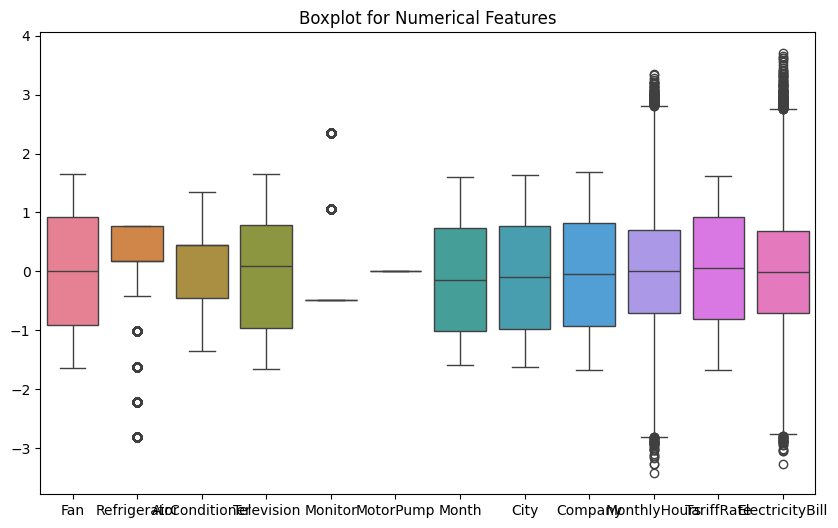

In [48]:
#VISUALIZATIONS
# Boxplot for numerical features to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_cols])
plt.title("Boxplot for Numerical Features")
plt.show()


In [49]:
#TRAIN/TEST AND SPLIT
# Replace 'ElectricityBill' with the actual target column name if it's different
X = data.drop('ElectricityBill', axis=1)  # Drop the target column from the features
y = data['ElectricityBill']  # Use 'ElectricityBill' as the target variable

# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (36276, 11)
Test set shape: (9069, 11)
